In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("../../dataset/First Experiment/Aegean/Aegean(SKG_LIS).xlsx")
df = pd.DataFrame(data)

In [4]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,20:50:00,13:45:00,0,4,1,2,1,222,377.01
1,23:15:00,13:45:00,0,4,1,2,1,222,377.01
2,23:15:00,22:30:00,0,4,1,2,1,222,409.17
3,20:50:00,14:55:00,0,4,1,2,1,222,442.17
4,20:50:00,13:45:00,0,4,2,2,1,444,518.01


In [5]:
for i in df.columns:
  print(i,"\t\t-\t", df[i].isna().mean()*100)

departure_time 		-	 0.0
arrival_time 		-	 0.0
days_before 		-	 0.0
day_of_week 		-	 0.0
num_of_luggage 		-	 0.0
num_of_stops 		-	 0.0
overnight_flight 		-	 0.0
Class 		-	 0.0
price 		-	 0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16597 entries, 0 to 16596
Data columns (total 9 columns):
departure_time      16597 non-null object
arrival_time        16597 non-null object
days_before         16597 non-null int64
day_of_week         16597 non-null int64
num_of_luggage      16597 non-null int64
num_of_stops        16597 non-null int64
overnight_flight    16597 non-null int64
Class               16597 non-null int64
price               16597 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.shape

(16597, 9)

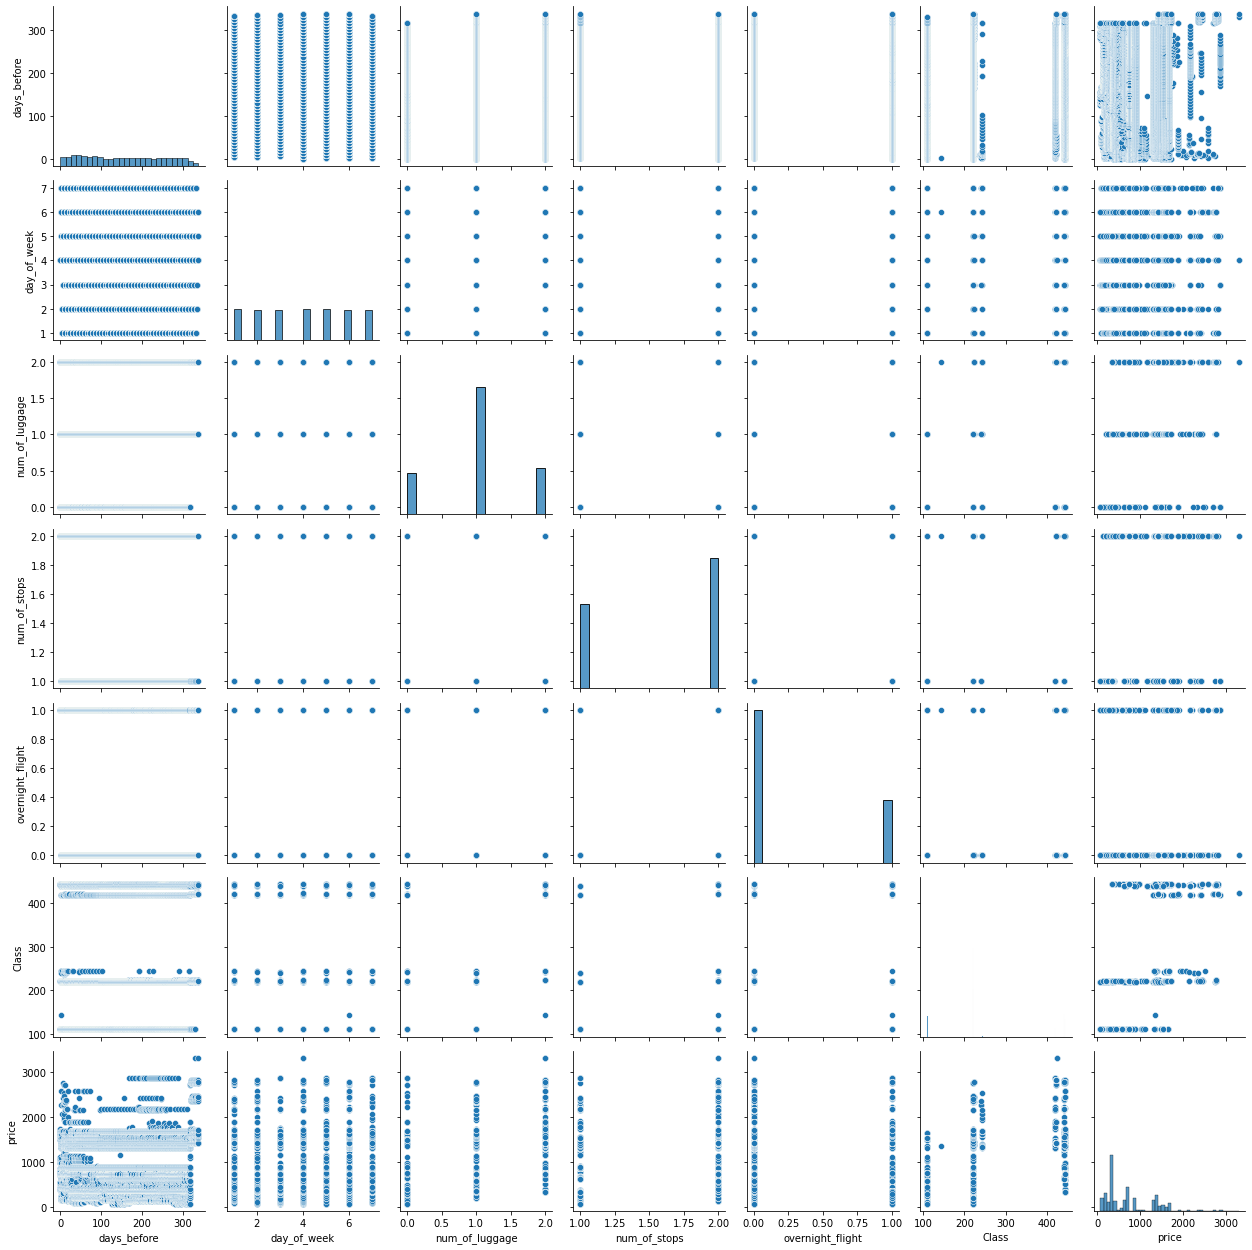

In [8]:
sns.pairplot(df)
plt.tight_layout()

In [9]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')

In [10]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')

In [11]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,1900-01-01 20:50:00,1900-01-01 13:45:00,0,4,1,2,1,222,377.01
1,1900-01-01 23:15:00,1900-01-01 13:45:00,0,4,1,2,1,222,377.01
2,1900-01-01 23:15:00,1900-01-01 22:30:00,0,4,1,2,1,222,409.17
3,1900-01-01 20:50:00,1900-01-01 14:55:00,0,4,1,2,1,222,442.17
4,1900-01-01 20:50:00,1900-01-01 13:45:00,0,4,2,2,1,444,518.01


In [12]:
df['departuretime'] = pd.to_datetime(df['departure_time']).astype(np.int64)

In [13]:
df['arrivaltime'] = pd.to_datetime(df['arrival_time']).astype(np.int64)

In [14]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price,departuretime,arrivaltime
0,1900-01-01 20:50:00,1900-01-01 13:45:00,0,4,1,2,1,222,377.01,-2208913800000000000,-2208939300000000000
1,1900-01-01 23:15:00,1900-01-01 13:45:00,0,4,1,2,1,222,377.01,-2208905100000000000,-2208939300000000000
2,1900-01-01 23:15:00,1900-01-01 22:30:00,0,4,1,2,1,222,409.17,-2208905100000000000,-2208907800000000000
3,1900-01-01 20:50:00,1900-01-01 14:55:00,0,4,1,2,1,222,442.17,-2208913800000000000,-2208935100000000000
4,1900-01-01 20:50:00,1900-01-01 13:45:00,0,4,2,2,1,444,518.01,-2208913800000000000,-2208939300000000000


In [15]:
df.columns

Index(['departure_time', 'arrival_time', 'days_before', 'day_of_week',
       'num_of_luggage', 'num_of_stops', 'overnight_flight', 'Class', 'price',
       'departuretime', 'arrivaltime'],
      dtype='object')

In [16]:
df = df[['departuretime','arrivaltime','day_of_week', 'days_before','num_of_luggage', 'num_of_stops', 'overnight_flight','Class','price']]

In [17]:
del df['departuretime']

In [18]:
del df['arrivaltime']

In [19]:
#df = df.apply(np.int64)

In [20]:
df.head()

,day_of_week,days_before,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,4,0,1,2,1,222,377.01
1,4,0,1,2,1,222,377.01
2,4,0,1,2,1,222,409.17
3,4,0,1,2,1,222,442.17
4,4,0,2,2,1,444,518.01


In [21]:
df.to_csv('skg_lis_proc.csv')

In [22]:
X = df.drop(['price'], axis=1)
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [1]:
ML_Model = []
accuracy = []

#function to call for storing the results
def storeResults(model, a):
    ML_Model.append(model)
    accuracy.append(round(a, 3))

# AdaBoost

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [25]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [26]:
from sklearn.ensemble import AdaBoostRegressor
search_grid={'n_estimators':[5000,10000,20000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
adr = AdaBoostRegressor()
search=GridSearchCV(estimator=adr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [5000, 10000, 20000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [27]:
y_pred = search.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.47658331603364534


In [2]:
ab_sc = r2_score(y_test, y_pred)
storeResults('AdaBoost',ab_sc)

# Bagging Regressor

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf = BaggingRegressor(DecisionTreeRegressor(),n_estimators=10000, random_state=0)

clf.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10000,
                 random_state=0)

In [29]:
y_pred = clf.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7957367945679995


In [3]:
bag_sc = r2_score(y_test, y_pred)
storeResults('Bagging',bag_sc)

# Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=10000, random_state=0)

gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7720445885632017


In [4]:
gb_sc = r2_score(y_test, y_pred)
storeResults('Gradient Boosting',gb_sc)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)

dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7975888075139057


In [5]:
dt_sc = r2_score(y_test, y_pred)
storeResults('Decision Tree',dt_sc)

# RAndom Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rfr = RandomForestRegressor(max_depth=2, random_state=0)

grid_forest = GridSearchCV(rfr,param_grid=param_grid)

grid_forest.fit(X_train,y_train)

y_pred = grid_forest.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.6161927196679118


In [6]:
rf_sc = r2_score(y_test, y_pred)
storeResults('Random Forest',rf_sc)

# Extra Tree

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=10000, random_state=0)

etr.fit(X_train,y_train)

y_pred = etr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7975877647010627


In [7]:
et_sc = r2_score(y_test, y_pred)
storeResults('Extra Tree',et_sc)

# SVR

In [34]:
from sklearn.svm import SVR

sr = SVR(C=1.0, epsilon=0.2)

sr.fit(X_train,y_train)

y_pred = sr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.2766142509336059


In [8]:
svr_sc = r2_score(y_test, y_pred)
storeResults('SVR',svr_sc)

# MLP

In [35]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.5246546508625729


In [9]:
mlp_sc = r2_score(y_test, y_pred)
storeResults('MLP',mlp_sc)

# DL

In [36]:
X_train = np.array(X).reshape(X.shape[0], X.shape[1], 1)
X_test = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [37]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


In [38]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

# VGG11

In [39]:
def vgg11():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [40]:
model = vgg11()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 32)             128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 128)            41088     
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                38450     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [41]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
415/415 [==============================] - 6s 4ms/step - loss: 189164.7344 - val_loss: 288882.0938
Epoch 2/200
415/415 [==============================] - 2s 4ms/step - loss: 175045.4219 - val_loss: 288814.1250
Epoch 3/200
415/415 [==============================] - 2s 4ms/step - loss: 160043.1562 - val_loss: 265455.3438
Epoch 4/200
415/415 [==============================] - 2s 4ms/step - loss: 145732.9219 - val_loss: 264756.0312
Epoch 5/200
415/415 [==============================] - 2s 4ms/step - loss: 142533.6406 - val_loss: 239438.1562
Epoch 6/200
415/415 [==============================] - 2s 4ms/step - loss: 137903.2812 - val_loss: 244148.5312
Epoch 7/200
415/415 [==============================] - 2s 4ms/step - loss: 133139.5469 - val_loss: 239947.4844
Epoch 8/200
415/415 [==============================] - 2s 4ms/step - loss: 130361.4844 - val_loss: 274937.9375
Epoch 9/200
415/415 [==============================] - 2s 4ms/step - loss: 126172.0703 - val_loss: 242588.2031
E

415/415 [==============================] - 2s 5ms/step - loss: 80975.6016 - val_loss: 242834.0625
Epoch 148/200
415/415 [==============================] - 2s 5ms/step - loss: 81855.3125 - val_loss: 238111.4844
Epoch 149/200
415/415 [==============================] - 2s 5ms/step - loss: 81196.8984 - val_loss: 239581.2656
Epoch 150/200
415/415 [==============================] - 2s 5ms/step - loss: 81136.4219 - val_loss: 238616.2969
Epoch 151/200
415/415 [==============================] - 2s 5ms/step - loss: 81194.8438 - val_loss: 257266.1250
Epoch 152/200
415/415 [==============================] - 2s 5ms/step - loss: 81268.8203 - val_loss: 231646.4219
Epoch 153/200
415/415 [==============================] - 2s 5ms/step - loss: 81435.0156 - val_loss: 245279.2656
Epoch 154/200
415/415 [==============================] - 2s 5ms/step - loss: 80725.7734 - val_loss: 259650.1719
Epoch 155/200
415/415 [==============================] - 2s 5ms/step - loss: 81151.2266 - val_loss: 234050.6406
Epoch 

In [42]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.6229459877357781


In [10]:
vgg_sc = r2_score(y, y_pred)
storeResults('VGG11',vgg_sc)

# VGG13

In [43]:
def vgg13():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [44]:
model = vgg13()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [45]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
415/415 [==============================] - 3s 6ms/step - loss: 192347.9219 - val_loss: 317008.4688
Epoch 2/200
415/415 [==============================] - 2s 5ms/step - loss: 172379.5156 - val_loss: 285563.0312
Epoch 3/200
415/415 [==============================] - 2s 5ms/step - loss: 161716.4688 - val_loss: 242651.6562
Epoch 4/200
415/415 [==============================] - 2s 5ms/step - loss: 144514.2031 - val_loss: 250219.5625
Epoch 5/200
415/415 [==============================] - 2s 5ms/step - loss: 139855.7500 - val_loss: 226686.0156
Epoch 6/200
415/415 [==============================] - 2s 5ms/step - loss: 135714.9531 - val_loss: 231999.7812
Epoch 7/200
415/415 [==============================] - 2s 5ms/step - loss: 133549.9062 - val_loss: 223460.1406
Epoch 8/200
415/415 [==============================] - 2s 5ms/step - loss: 129743.3984 - val_loss: 227648.6562
Epoch 9/200
415/415 [==============================] - 2s 5ms/step - loss: 126619.0938 - val_loss: 228684.0312
E

415/415 [==============================] - 3s 6ms/step - loss: 84710.3438 - val_loss: 206930.9531
Epoch 148/200
415/415 [==============================] - 2s 6ms/step - loss: 85314.7031 - val_loss: 262496.5312
Epoch 149/200
415/415 [==============================] - 2s 6ms/step - loss: 84751.7656 - val_loss: 219798.6719
Epoch 150/200
415/415 [==============================] - 2s 6ms/step - loss: 84704.1953 - val_loss: 210090.4688
Epoch 151/200
415/415 [==============================] - 2s 6ms/step - loss: 84113.5469 - val_loss: 211063.7500
Epoch 152/200
415/415 [==============================] - 3s 6ms/step - loss: 84546.8672 - val_loss: 205624.1562
Epoch 153/200
415/415 [==============================] - 3s 6ms/step - loss: 83895.2500 - val_loss: 207391.5625
Epoch 154/200
415/415 [==============================] - 2s 5ms/step - loss: 83945.1719 - val_loss: 215496.7656
Epoch 155/200
415/415 [==============================] - 2s 5ms/step - loss: 83911.3203 - val_loss: 212074.9688
Epoch 

In [46]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.6188657200564869


In [12]:
vgg1_sc = r2_score(y, y_pred)
storeResults('VGG13',vgg1_sc)

# ResNet18

In [47]:
def resnet18():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet18()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [48]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
415/415 [==============================] - 2s 5ms/step - loss: 192983.4531 - val_loss: 303149.5625
Epoch 2/200
415/415 [==============================] - 2s 5ms/step - loss: 174812.5469 - val_loss: 279409.0000
Epoch 3/200
415/415 [==============================] - 2s 5ms/step - loss: 173145.3281 - val_loss: 290675.9375
Epoch 4/200
415/415 [==============================] - 2s 5ms/step - loss: 160367.9219 - val_loss: 255255.1875
Epoch 5/200
415/415 [==============================] - 2s 5ms/step - loss: 146041.7188 - val_loss: 236558.1875
Epoch 6/200
415/415 [==============================] - 2s 5ms/step - loss: 140829.4688 - val_loss: 235826.9375
Epoch 7/200
415/415 [==============================] - 2s 5ms/step - loss: 137266.5312 - val_loss: 252028.9219
Epoch 8/200
415/415 [==============================] - 2s 5ms/step - loss: 136284.7500 - val_loss: 227761.3906
Epoch 9/200
415/415 [==============================] - 2s 5ms/step - loss: 131596.2188 - val_loss: 246635.0625
E

415/415 [==============================] - 3s 6ms/step - loss: 83165.1953 - val_loss: 283297.4375
Epoch 148/200
415/415 [==============================] - 3s 6ms/step - loss: 82794.9062 - val_loss: 221536.4688
Epoch 149/200
415/415 [==============================] - 3s 6ms/step - loss: 83339.9453 - val_loss: 247249.1562
Epoch 150/200
415/415 [==============================] - 3s 6ms/step - loss: 83426.7344 - val_loss: 223300.7812
Epoch 151/200
415/415 [==============================] - 2s 6ms/step - loss: 83556.7188 - val_loss: 251366.7812
Epoch 152/200
415/415 [==============================] - 2s 5ms/step - loss: 83203.3359 - val_loss: 255650.8281
Epoch 153/200
415/415 [==============================] - 2s 5ms/step - loss: 82667.5547 - val_loss: 247094.8281
Epoch 154/200
415/415 [==============================] - 2s 5ms/step - loss: 83126.7422 - val_loss: 226713.4062
Epoch 155/200
415/415 [==============================] - 2s 5ms/step - loss: 82435.7891 - val_loss: 239949.7656
Epoch 

In [13]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet18',res18_sc)

# ResNet34

In [49]:
def resnet34():
    
    model = Sequential()
    
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(516, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet34()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 6, 128)            24704     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 6, 516)            330756    
_________________________________________________________________
flatten_3 (Flatten)          (None, 3096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                154850    
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [50]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
415/415 [==============================] - 3s 6ms/step - loss: 184728.2812 - val_loss: 291276.0938
Epoch 2/200
415/415 [==============================] - 2s 6ms/step - loss: 165602.1562 - val_loss: 244905.1406
Epoch 3/200
415/415 [==============================] - 2s 5ms/step - loss: 146171.7188 - val_loss: 247401.6562
Epoch 4/200
415/415 [==============================] - 2s 5ms/step - loss: 137433.0938 - val_loss: 223269.8594
Epoch 5/200
415/415 [==============================] - 2s 5ms/step - loss: 133437.7812 - val_loss: 231410.4062
Epoch 6/200
415/415 [==============================] - 2s 6ms/step - loss: 127381.4141 - val_loss: 230359.7656
Epoch 7/200
415/415 [==============================] - 2s 5ms/step - loss: 123922.0703 - val_loss: 218636.4531
Epoch 8/200
415/415 [==============================] - 2s 5ms/step - loss: 121140.6250 - val_loss: 228199.5938
Epoch 9/200
415/415 [==============================] - 2s 5ms/step - loss: 119283.4609 - val_loss: 230419.6875
E

415/415 [==============================] - 2s 5ms/step - loss: 81096.0156 - val_loss: 234945.9688
Epoch 148/200
415/415 [==============================] - 2s 5ms/step - loss: 81037.3438 - val_loss: 263471.6875
Epoch 149/200
415/415 [==============================] - 2s 5ms/step - loss: 80886.8047 - val_loss: 244284.1250
Epoch 150/200
415/415 [==============================] - 2s 5ms/step - loss: 81162.3828 - val_loss: 239410.5000
Epoch 151/200
415/415 [==============================] - 2s 5ms/step - loss: 80540.3906 - val_loss: 271372.2188
Epoch 152/200
415/415 [==============================] - 2s 5ms/step - loss: 80412.6484 - val_loss: 261144.3438
Epoch 153/200
415/415 [==============================] - 2s 5ms/step - loss: 80903.8984 - val_loss: 260170.3750
Epoch 154/200
415/415 [==============================] - 2s 5ms/step - loss: 81021.7031 - val_loss: 252899.0469
Epoch 155/200
415/415 [==============================] - 2s 5ms/step - loss: 80916.1719 - val_loss: 279541.0938
Epoch 

In [14]:
res34_sc = r2_score(y, y_pred)
storeResults('ResNet34',res34_sc)

# MobileNetv1

In [51]:
def mobilenetv1():
    
    model = Sequential()
    
    model.add(Conv1D(8, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(32, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 6, 8)              32        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 6, 16)             400       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 6, 32)             2592      
_________________________________________________________________
flatten_4 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                9650      
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [52]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
415/415 [==============================] - 3s 6ms/step - loss: 212408.7500 - val_loss: 313611.5938
Epoch 2/200
415/415 [==============================] - 2s 5ms/step - loss: 173415.1562 - val_loss: 282855.4062
Epoch 3/200
415/415 [==============================] - 2s 5ms/step - loss: 173193.5312 - val_loss: 286455.9062
Epoch 4/200
415/415 [==============================] - 2s 5ms/step - loss: 172192.5000 - val_loss: 287464.4688
Epoch 5/200
415/415 [==============================] - 2s 5ms/step - loss: 169403.9375 - val_loss: 283390.9062
Epoch 6/200
415/415 [==============================] - 2s 5ms/step - loss: 161435.8750 - val_loss: 270337.9375
Epoch 7/200
415/415 [==============================] - 2s 5ms/step - loss: 153049.8750 - val_loss: 241028.1250
Epoch 8/200
415/415 [==============================] - 2s 5ms/step - loss: 149378.2031 - val_loss: 237213.2031
Epoch 9/200
415/415 [==============================] - 2s 5ms/step - loss: 147625.0938 - val_loss: 235979.0469
E

415/415 [==============================] - 2s 5ms/step - loss: 86046.3281 - val_loss: 234748.1562
Epoch 148/200
415/415 [==============================] - 2s 5ms/step - loss: 85758.5703 - val_loss: 227311.8281
Epoch 149/200
415/415 [==============================] - 2s 5ms/step - loss: 85929.3125 - val_loss: 233006.8750
Epoch 150/200
415/415 [==============================] - 2s 5ms/step - loss: 85708.0469 - val_loss: 232683.3125
Epoch 151/200
415/415 [==============================] - 2s 5ms/step - loss: 85063.5625 - val_loss: 232983.8281
Epoch 152/200
415/415 [==============================] - 2s 5ms/step - loss: 85307.2344 - val_loss: 224525.5156
Epoch 153/200
415/415 [==============================] - 2s 5ms/step - loss: 85359.9609 - val_loss: 241782.0000
Epoch 154/200
415/415 [==============================] - 2s 5ms/step - loss: 85425.4766 - val_loss: 217317.7656
Epoch 155/200
415/415 [==============================] - 2s 5ms/step - loss: 85404.5547 - val_loss: 215215.9688
Epoch 

In [15]:
mob1_sc = r2_score(y, y_pred)
storeResults('MobileNetV1',mob1_sc)

# MobileNetV2

In [53]:
def mobilenetv2():
    
    model = Sequential()
    
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(516, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(1024, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv2()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 6, 128)            512       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 6, 516)            198660    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 6, 1024)           2642944   
_________________________________________________________________
flatten_5 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                307250    
_________________________________________________________________
dense_16 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [54]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
415/415 [==============================] - 3s 7ms/step - loss: 186703.4531 - val_loss: 339580.6562
Epoch 2/200
415/415 [==============================] - 3s 6ms/step - loss: 165777.2344 - val_loss: 267526.6562
Epoch 3/200
415/415 [==============================] - 3s 6ms/step - loss: 148120.2812 - val_loss: 231515.7656
Epoch 4/200
415/415 [==============================] - 3s 6ms/step - loss: 138242.4062 - val_loss: 231832.7969
Epoch 5/200
415/415 [==============================] - 2s 6ms/step - loss: 131097.0312 - val_loss: 222828.2188
Epoch 6/200
415/415 [==============================] - 2s 6ms/step - loss: 126724.7891 - val_loss: 244130.1719
Epoch 7/200
415/415 [==============================] - 3s 6ms/step - loss: 122833.9453 - val_loss: 251521.1406
Epoch 8/200
415/415 [==============================] - 2s 6ms/step - loss: 120913.4844 - val_loss: 230579.0469
Epoch 9/200
415/415 [==============================] - 2s 6ms/step - loss: 120207.5234 - val_loss: 229461.1719
E

Epoch 75/200
415/415 [==============================] - 3s 6ms/step - loss: 86329.0547 - val_loss: 227615.4219
Epoch 76/200
415/415 [==============================] - 3s 6ms/step - loss: 85772.6875 - val_loss: 215996.0469
Epoch 77/200
415/415 [==============================] - 3s 6ms/step - loss: 85508.0781 - val_loss: 237891.9062
Epoch 78/200
415/415 [==============================] - 3s 6ms/step - loss: 86309.6562 - val_loss: 219924.9688
Epoch 79/200
415/415 [==============================] - 3s 6ms/step - loss: 85614.8359 - val_loss: 220877.2656
Epoch 80/200
415/415 [==============================] - 3s 6ms/step - loss: 85540.9219 - val_loss: 220351.8125
Epoch 81/200
415/415 [==============================] - 3s 6ms/step - loss: 85101.8594 - val_loss: 209218.9531
Epoch 82/200
415/415 [==============================] - 3s 6ms/step - loss: 85318.6406 - val_loss: 217991.2344
Epoch 83/200
415/415 [==============================] - 3s 6ms/step - loss: 85178.4922 - val_loss: 220895.7656
E

In [16]:
mob2_sc = r2_score(y, y_pred)
storeResults('MobileNetV2',mob2_sc)

# Comparison

In [17]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'R2-Score' : accuracy,
                      })

In [18]:
result

,ML Model,R2-Score
0,AdaBoost,0.476
1,Bagging,0.796
2,Gradient Boosting,0.772
3,Decision Tree,0.797
4,Random Forest,0.616
5,Extra Tree,0.797
6,SVR,0.277
7,MLP,0.525
8,VGG11,0.623
9,VGG13,0.619


# Graph

In [19]:
import numpy as np
classifier = ML_Model
y_pos = np.arange(len(classifier))

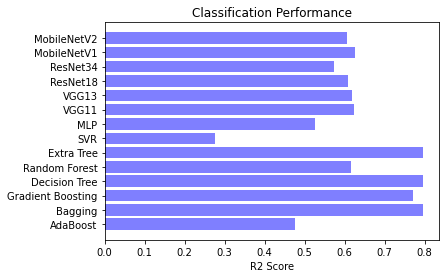

In [21]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('R2 Score')
plt2.title('Classification Performance')
plt2.show()